Análises

1. Pessoas que repetiram a mesma matéria durante o período
2. Seguir o "quadrimestre ideal" do BC&T
3. Matérias escolhidas por pessoas que entraram no mesmo ano
4. Matérias com alto índice de reprovação devem ter maior mistura de alunos de anos de ingresso diferentes. 
5. Quandidade média de matérias cursadas por quadrimestre/durante o periodo todo

Nota: Pros RAs de 8 digitos, o ano de ingresso são os dois ultimos dígitos

Estrutura do código: 
- Blocos individuais para cada "Parte" da execução
- Blocos para a filtragem dos CSVs
- Blocos para a construção dos grafos_por_quad_por_quad_por_quad_por_quad_por_quad
- Blocos para plotar os grafos

# O código de verdade começa aqui em baixo


In [84]:
# Inclusão das bibliotecas
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import igraph as ig


In [85]:
# Coisas aleatorias que podem ser uteis

# lista com os nomes dos arquivos de texto e csv sem o formato. tomara que dê pra iterar por 
# essa lista pra montar os csvs
filenames = ["2022_3_A", "2022_3_R", "2023_1_A", "2023_1_R" 
             , "2023_2_A",  "2023_2_R", "2023_3_A", "2023_3_R"
             , "2022_3_B", "2023_2_B"]

quads = ["2022_3", "2023_1", "2023_2", "2023_3"]

grafos_projetados_RA = {}
grafos_projetados_disciplina = {}

RAs = [] # armazena os RAs dos alunos
Disciplinas = [] # armazena as disciplinas

RAs_por_quad = {a:[] for a in quads}
turmas_por_quad = {a:[] for a in quads}

RAs_por_ano = {}
anos = []

In [86]:
# função pra pegar o ano de ingresso com base no RA
def ano(ra)-> str:
    ano_ing = ""

    if len(str(ra)) == 11: ano_ing = str(ra)[4:6]
    elif len(str(ra)) == 8: ano_ing = str(ra)[6:8]

    return ano_ing

In [87]:
# função pra retornar a disciplina com base no código da turma

def discFromTurma(turma:str) -> str:
    ans = ""

    if turma[2].isdigit(): ans = turma[3:13]
    else: ans = turma[2:12]

    return ans

In [88]:
# Código que forma os CSVs mesmo (tirando o dos bixos pq o pdf precisa de tratamentos diferentes)

RAs = [] # armazena os RAs dos alunos
Disciplinas = [] # armazena as disciplinas

RAs_por_quad = {a:[] for a in quads}
turmas_por_quad = {a:[] for a in quads}

ger = open("CSVs/geral.csv", 'w')
ger.write("")
ger.close()

ger = open("CSVs/geral.csv", 'a')
ger.write("RA,TURMA\n")

for k in filenames:
    auxc = "CSVs/" + k[0:6] + ".csv"

    t = open(auxc, "w")
    t.write("")
    t.close()

for k in filenames[0:8]:
    if k[7] == "B": continue

    auxc = "CSVs/" + k[0:6] + ".csv"
    auxt = "TXTs/" + k + ".txt"

    a = open(auxt, "r", encoding="utf-8")
    b = open(auxc, "a", encoding="utf-8")

    cont = 0 # ponteiro pra saber o a linha mesmo. nn sei pq tem isso

    auxiliarR = []
    auxiliarD = []

    for i in a:

        ins = ""

        cont+= 1

        l = 0 # contador do caracter atual da linha

        if cont == 1: continue # Caso esteja na primeira linha, só pula

        if cont == 2: # Caso esteja na segunda linha, adiciona os indices do CSV
            b.write("RA,TURMA\n")

            continue
        else:
            if not i[0].isnumeric() or i[2] == "/" or i[3] == "/" or i[4] == "/": continue 
            # ^se o primeiro digito for um numero ou for um fim da pagina do pdf ele só pula a escrita

        RA = ""
        disc = ""

        while i[l] != " ": # pega o RA até o primeiro espaço
            RA+= i[l]
            l+=1
        l+=1

        while i[l] != " ": # pega o codigo da turma até o segundo espaço
            disc+= i[l]
            l+=1
        l+=1

        # no código da turma, pode valer a pena ver de armazenar o codigo da disciplina só, pq aí
        # conseguimos procurar o nome mesmo no catálogo pra printar bonitinho depois

        if RA not in RAs: RAs.append(RA)
        if RA not in RAs_por_quad[k[0:6]]:
            RAs_por_quad[k[0:6]].append(RA)

        if disc not in turmas_por_quad[k[0:6]]: 
            turmas_por_quad[k[0:6]].append(disc)

        ins = RA + "," + disc + "\n"

        if disc[2].isdigit(): 
            ger.write(RA + "," + disc[3:13] + "\n")
            if disc[3:13] not in Disciplinas: Disciplinas.append(disc[3:13])
        else: 
            ger.write(RA + "," + disc[2:12] + "\n")
            if  disc[2:12] not in Disciplinas: Disciplinas.append(disc[2:12])

        b.write(ins)

    print("{}: OK".format(k))

    a.close()
    b.close()

# Montando o CSV dos bixos de 22 | filenames[8]

a = open("TXTs/2022_3_B.txt", "r", encoding="utf-8")
b = open("CSVs/2022_3.csv", "a", encoding="utf-8")

b.write("RA,TURMA\n")

for i in a:
    if i[0:2] != "11": continue

    ins = ""
    RA = ""
    disc = ""
    l = 0 # contador de linha

    while i[l] != " ":
        RA+= i[l]
        l+=1

    while i[l] != "S": l+= 1

    l+=3

    while i[l] != " ":
        disc+= i[l]
        l+=1

    if RA not in RAs: RAs.append(RA)
    if RA not in RAs_por_quad["2022_3"]:
        RAs_por_quad["2022_3"].append(RA)

    if disc not in turmas_por_quad["2022_3"]: 
        turmas_por_quad["2022_3"].append(disc)

    ins = RA + "," + disc + "\n"

    if disc[2].isdigit(): 
        ger.write(RA + "," + disc[3:13] + "\n")
        if disc[3:13] not in Disciplinas: Disciplinas.append(disc[3:13])
    else: 
        ger.write(RA + "," + disc[2:12] + "\n")
        if  disc[2:12] not in Disciplinas: Disciplinas.append(disc[2:12])
    
    b.write(ins)

a.close()
b.close()

print("2022_3_B: OK")

# Montando o CSV dos bixos de 23 | filenames[8]

a = open("TXTs/2023_2_B.txt", "r", encoding="utf-8")
b = open("CSVs/2023_2.csv", "a", encoding="utf-8")

b.write("RA,TURMA\n")

ins = ""
RA = ""
disc = ""
cont = 0

for i in a:

    vai = False
    for aux in ['15S', '19SB', '18SB', '16SB', '18SA', '16SA']: 
        if aux in i: vai = True

    if not (i[0:2] == "11" or vai): continue

    l = 0 # contador de linha

    if len(i) > 16:
        while i[l] != " ":
            RA+= i[l]
            l+=1

        disc = i[len(i)-16:len(i)]
    else: 
        if len(i) == 12:
            RA = i[0:len(i)-1]
        elif len(i) == 16:
            disc = i[0:len(i)]

    if len(i) > 16 or (RA != "" and disc != ""):
        if RA not in RAs: RAs.append(RA)
        if RA not in RAs_por_quad["2023_2"]:
            RAs_por_quad["2023_2"].append(RA)

        if disc not in turmas_por_quad["2023_2"]: 
            turmas_por_quad["2023_2"].append(disc)

        ins = RA + "," + disc

        if disc[2].isdigit(): 
            ger.write(RA + "," + disc[3:13] + "\n")
            if disc[3:13] not in Disciplinas: Disciplinas.append(disc[3:13])
        else: 
            ger.write(RA + "," + disc[2:12] + "\n")
            if  disc[2:12] not in Disciplinas: Disciplinas.append(disc[2:12])
        
        b.write(ins)

        ins = ""
        RA = ""
        disc = ""

a.close()
b.close()

print("2023_2_B: OK")

ger.close()

2022_3_A: OK
2022_3_R: OK
2023_1_A: OK
2023_1_R: OK
2023_2_A: OK
2023_2_R: OK
2023_3_A: OK
2023_3_R: OK
2022_3_B: OK
2023_2_B: OK


In [89]:
# montando os grafos individuais

grafos_por_quad = {}

for k in quads:
    auxc = "CSVs/" + k + ".csv"    

    a = pd.read_csv(auxc) # Lê o csv do grafo

    b = a.to_numpy()

    grafos_por_quad[k] = nx.Graph()

    for i in b:
        grafos_por_quad[k].add_node((str)(i[0]), bipartite = 0, ano_de_ingresso=ano((str)(i[0][0])))
        grafos_por_quad[k].add_node((str)(i[1]), bipartite = 1)
        grafos_por_quad[k].add_edge((str)(i[0]), (str)(i[1]))

    print("{} : {}".format(k, grafos_por_quad[k]))

grafo_global = nx.Graph()

auxiliar_grafo_geral = {}

ge = pd.read_csv("CSVs/geral.csv")

lis = ge.to_numpy()

# *np.unique(degree_sequence, return_counts=True) usar algo assim 

for i in lis: # esses pesos estão estranhos. 
    k = ((str)(i[0]), (str)(i[1]))

    if k not in auxiliar_grafo_geral: 
        auxiliar_grafo_geral[k] = 1 
    else: 
        auxiliar_grafo_geral[k]+= 1

for i in list(auxiliar_grafo_geral.items()):

    grafo_global.add_node((str)(i[0][0]), bipartite = 0, ano_de_ingresso=ano((str)(i[0][0])))
    grafo_global.add_node((str)(i[0][1]), bipartite = 1)
    grafo_global.add_edge((str)(i[0][0]), (str)(i[0][1]), weight=i[1])

print(grafo_global)

2022_3 : Graph with 13246 nodes and 49227 edges
2023_1 : Graph with 12651 nodes and 44605 edges
2023_2 : Graph with 13595 nodes and 50131 edges
2023_3 : Graph with 13120 nodes and 47021 edges
Graph with 16036 nodes and 180496 edges


In [90]:
# Montando os grafos projetados pelos RAs


grafos_projetados_RA = {}

for i in quads:
    grafos_projetados_RA[i] = nx.bipartite.weighted_projected_graph(grafos_por_quad[i], RAs_por_quad[i])

    print(grafos_projetados_RA[i])

Graph with 12129 nodes and 1093966 edges
Graph with 11673 nodes and 1190218 edges
Graph with 12560 nodes and 1214727 edges
Graph with 12140 nodes and 1292530 edges


In [91]:
# quantidade de RAs por ano de ingresso

anos = []

for i in RAs:
    if ano(i) not in anos: anos.append(ano(i))

anos.sort()

RAs_por_ano = {a:int(0) for a in anos}

for i in RAs:
    RAs_por_ano[ano(i)]+= 1

print(RAs_por_ano)

{'06': 3, '07': 6, '08': 17, '09': 31, '10': 61, '11': 114, '12': 193, '13': 307, '14': 466, '15': 742, '16': 976, '17': 1307, '18': 1588, '19': 1687, '20': 1616, '21': 1625, '22': 2194, '23': 2209}


In [92]:
# Mapear quadrimestres quando a interação entre veteranos e
# ingressantes é iniciada e quando ela aumenta

# pra fazer isso, preciso projetar o grafo usando os RAs e comparar o atributo de ano de ingresso dos vertices de cada aresta

ingressantes_diferentes = {k:{i:0.0 for i in quads} for k in anos}  

for k in anos:
    for i in quads:
        for ed in grafos_projetados_RA[i].edges():
            if ano(ed[0]) != ano(ed[1]) and (ano(ed[0]) == k or ano(ed[1]) == k): 
                ingressantes_diferentes[k][i]+= 1
        ingressantes_diferentes[k][i]/= RAs_por_ano[k]

print(ingressantes_diferentes)

{'06': {'2022_3': 10.666666666666666, '2023_1': 125.0, '2023_2': 20.0, '2023_3': 38.666666666666664}, '07': {'2022_3': 39.5, '2023_1': 57.666666666666664, '2023_2': 52.0, '2023_3': 33.0}, '08': {'2022_3': 89.6470588235294, '2023_1': 43.35294117647059, '2023_2': 40.11764705882353, '2023_3': 35.94117647058823}, '09': {'2022_3': 47.064516129032256, '2023_1': 45.483870967741936, '2023_2': 34.806451612903224, '2023_3': 25.419354838709676}, '10': {'2022_3': 56.032786885245905, '2023_1': 70.93442622950819, '2023_2': 46.26229508196721, '2023_3': 29.21311475409836}, '11': {'2022_3': 78.04385964912281, '2023_1': 80.64035087719299, '2023_2': 45.3859649122807, '2023_3': 51.20175438596491}, '12': {'2022_3': 78.80829015544042, '2023_1': 84.44559585492227, '2023_2': 58.61658031088083, '2023_3': 59.51813471502591}, '13': {'2022_3': 88.19543973941369, '2023_1': 88.39413680781759, '2023_2': 62.11074918566775, '2023_3': 56.65798045602606}, '14': {'2022_3': 87.93991416309012, '2023_1': 93.87124463519314, 

In [93]:
# maiores turmas

maiores_turmas = {a:[] for a in quads}

for q in quads:
    aux = nx.degree(grafos_por_quad[q])
    for d in aux:
        if "-" in d[0]: 
            maiores_turmas[q].append(d)
    
    maiores_turmas[q].sort(key=lambda a:a[1], reverse=True)

for i in quads: print("{}".format(i), end=' | ')
print()

print(maiores_turmas)

2022_3 | 2023_1 | 2023_2 | 2023_3 | 
{'2022_3': [('NB1BIN0406-15SA', 134), ('DB1BIN0406-15SA', 129), ('DB2BIN0406-15SA', 111), ('NA2BHQ0003-15SB', 105), ('NC3BIS0003-15SA', 104), ('NA1ESHR004-13SB', 103), ('NA1BCN0402-15SB', 103), ('NBESTO012-17SB', 102), ('NA1BHO0102-15SB', 102), ('NA1BHP0202-15SB', 102), ('NA1ESHC040-21SB', 102), ('NA1ESHP018-14SB', 102), ('NA1BCN0405-15SA', 101), ('DA1BHO0001-19SB', 101), ('NA1BHQ0004-19SB', 100), ('NA1ESHP022-14SB', 99), ('NA1BIN0406-15SA', 98), ('NA1BHO1102-19SB', 98), ('NA1BHO0101-15SB', 98), ('NA3BIS0003-15SA', 98), ('NA1ESHC034-21SB', 98), ('NA2BHO0102-15SB', 98), ('DB1BIS0003-15SA', 98), ('NB1ESTO008-17SA', 97), ('NA2BIN0406-15SB', 97), ('NB1BCM0506-15SB', 97), ('NA1ESHP007-13SB', 97), ('NA1MCTB001-17SA', 97), ('NA1BIQ0602-15SB', 97), ('NA1BIQ0602-15SA', 97), ('NB1BIR0004-15SA', 97), ('DA1ESTO012-17SA', 96), ('NA2BIR0004-15SA', 96), ('DA1BHQ0001-15SB', 96), ('NB1BCM0506-15SA', 96), ('NA1ESHR018-13SB', 96), ('NA1BIR0603-15SB', 95), ('DB1ESTO012

In [112]:
# disciplinas com mais matriculas
# usar as contas do bloco de cima pra facilitar

matriculas_disc = {a:0.0 for a in Disciplinas}

for i in quads:
    for j in maiores_turmas[i]:
        matriculas_disc[discFromTurma(j[0])]+= j[1]


for i in range(5):
    print("{}:{}".format(sorted(matriculas_disc, reverse=False)[i], matriculas_disc[sorted(matriculas_disc, reverse=False)[i]]))

print()

for i in range(5):
    print("{}:{}".format(sorted(matriculas_disc, reverse=False)[i], matriculas_disc[sorted(matriculas_disc, reverse=True)[i]]))


print("Olhar no catalogo pq nn to c vontade de codar isso em")

BCJ0203-15:2401.0
BCJ0204-15:3002.0
BCJ0205-15:1571.0
BCK0103-15:1256.0
BCK0104-15:1632.0

BCJ0203-15:65.0
BCJ0204-15:64.0
BCJ0205-15:22.0
BCK0103-15:58.0
BCK0104-15:47.0


In [95]:
# tabela RAs de anos diferentes
print("    |", end="")

for i in quads:
    print("  {} |".format(i), end="")

print()

for i in ingressantes_diferentes:
    print(i, end="  | ")
    for j in ingressantes_diferentes[i]:
        print("{:.4f} | ".format(ingressantes_diferentes[i][j]), end="")
    print()

    |  2022_3 |  2023_1 |  2023_2 |  2023_3 |
06  | 10.6667 | 125.0000 | 20.0000 | 38.6667 | 
07  | 39.5000 | 57.6667 | 52.0000 | 33.0000 | 
08  | 89.6471 | 43.3529 | 40.1176 | 35.9412 | 
09  | 47.0645 | 45.4839 | 34.8065 | 25.4194 | 
10  | 56.0328 | 70.9344 | 46.2623 | 29.2131 | 
11  | 78.0439 | 80.6404 | 45.3860 | 51.2018 | 
12  | 78.8083 | 84.4456 | 58.6166 | 59.5181 | 
13  | 88.1954 | 88.3941 | 62.1107 | 56.6580 | 
14  | 87.9399 | 93.8712 | 69.1867 | 61.9120 | 
15  | 101.8625 | 97.8154 | 73.9488 | 69.5081 | 
16  | 111.9816 | 106.1773 | 88.9785 | 81.0471 | 
17  | 132.0505 | 129.0199 | 107.5295 | 100.1446 | 
18  | 151.4874 | 155.5233 | 135.2985 | 126.1348 | 
19  | 161.5050 | 171.1446 | 153.4072 | 152.6763 | 
20  | 165.1349 | 176.2073 | 162.4443 | 169.4022 | 
21  | 136.2628 | 168.0406 | 169.6818 | 181.1914 | 
22  | 53.3861 | 99.4836 | 115.3423 | 136.4029 | 
23  | 0.0000 | 0.0000 | 53.6256 | 96.3481 | 


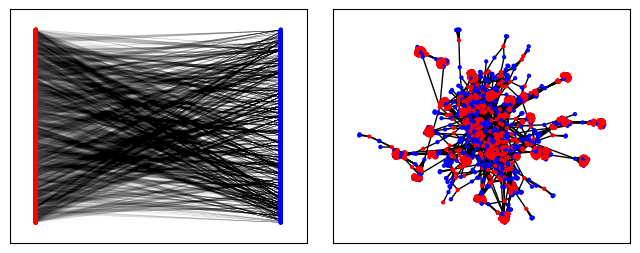

In [96]:
# plotando os grafos dos bixos de 22 de exemplo
fig = plt.figure("a", figsize=(8, 8))

axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
ax2 = fig.add_subplot(axgrid[3:, 2:])

arestas_bixos_22 = []
bixos_22 = []
turmas_22 = []

for i in grafos_por_quad["2022_3"].edges():
    if "112022" in i[0] or "112022" in i[1]: arestas_bixos_22.append(i)
    if "112022" in i[0]: bixos_22.append(i[0])
    else: turmas_22.append(i[0])

    if "112022" in i[1]: bixos_22.append(i[1])
    else: turmas_22.append(i[1])

te = nx.edge_subgraph(grafos_por_quad["2022_3"], arestas_bixos_22)

color = []

k = nx.get_node_attributes(te, "bipartite")

for i in k:
    if k[i] == 0:
        color.append("#ff0000")
    else: 
        color.append("#0000ff")

args = {
    "G":te, 
    "node_size":5, 
    "node_shape":".", 
    "node_color":color, 
    "with_labels":False, 
    "arrows":False,
    "pos":nx.bipartite_layout(te, bixos_22, align="vertical"),
    "width":0.01, 
    "ax":ax1,
    "linewidths":2
}

args2 = {
    "G":te, 
    "node_size":5, 
    "node_shape":".", 
    "node_color":color, 
    "with_labels":False, 
    "arrows":False,
    #"pos":nx.bipartite_layout(te, bixos_22, align="horizontal", ax=ax1),
    "width":1, 
    "ax":ax2,
    "linewidths":2
}

nx.draw_networkx(**args)
nx.draw_networkx(**args2)
# plt.savefig("test.pdf") # não ta funfando direito

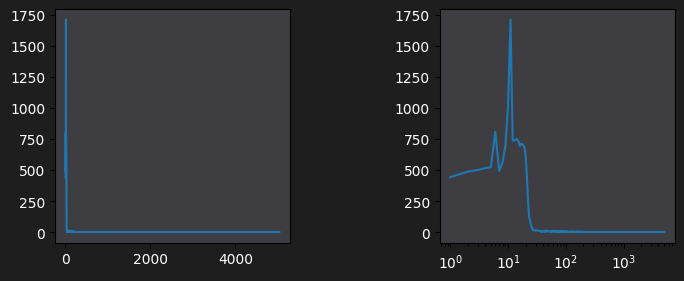

In [97]:
# graficos representando os graus do grafo geral

fig = plt.figure("Degree of a random graph", figsize=(8, 8))

axgrid = fig.add_gridspec(5, 5)

fig.set_facecolor("#1e1e1e")

ax1 = fig.add_subplot(axgrid[3:, :2])
ax2 = fig.add_subplot(axgrid[3:, 3:])

ax1.set_facecolor("#3e3e42")
ax1.tick_params(labelcolor="#ffffff")

ax2.set_facecolor("#3e3e42")
ax2.tick_params(labelcolor="#ffffff")

degree_sequence = sorted((d for n, d in grafo_global.degree()), reverse=True)

ax1.plot(*np.unique(degree_sequence, return_counts=True))

plt.xscale("log")

ax2.plot(*np.unique(degree_sequence, return_counts=True))

In [ ]:
# provavelmente inutil agora
# isso projeta o grafo original com os pesos sendo as turmas compartilhadas pelas pessoas

# g2 = nx.bipartite.weighted_projected_graph(grafo_global, RAs) 

# C = 0

# print(g2)

# for k in list(nx.get_edge_attributes(g2, "weight").values()):
#     print(k)
#     # C+= k

# print(C / len(RAs))

None
quandidade média de disciplinas cursadas no período? 12.619006736230352
quandtidade média de vezes que uma disciplina é repetida: 1.0586217977129686
(array([1, 2, 3, 4, 5]), array([170677,   9105,    667,     46,      1], dtype=int64))


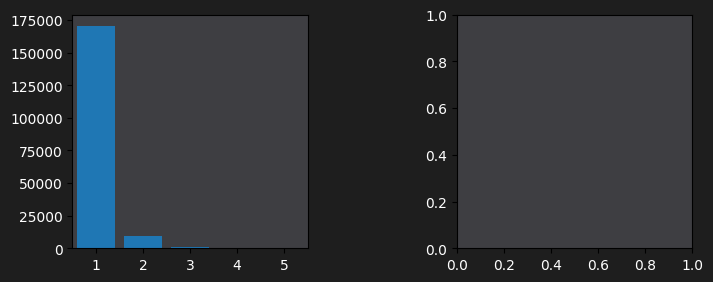

In [100]:
# conferia a matematica daqi
# possivelmente a quantidade média de disciplinas cursadas por pessoa em

fig = plt.figure("Degree of a random graph", figsize=(8, 8))

axgrid = fig.add_gridspec(5, 5)

fig.set_facecolor("#1e1e1e")

ax1 = fig.add_subplot(axgrid[3:, :2])
ax2 = fig.add_subplot(axgrid[3:, 3:])

ax1.set_facecolor("#3e3e42")
ax1.tick_params(labelcolor="#ffffff")

ax2.set_facecolor("#3e3e42")
ax2.tick_params(labelcolor="#ffffff")

wei = nx.get_edge_attributes(grafo_global, "weight")

aver = 0

for i in wei:
    aver+= wei[i]

ee = []

for i in wei:
    ee.append(wei[i])

print(ee.sort())

ax1.bar(*np.unique(ee, return_counts=True))
ax1.set_xlim(0.5, 5.5)

print("quandidade média de disciplinas cursadas no período? {}".format(aver / len(RAs)))
print("quandtidade média de vezes que uma disciplina é repetida: {}".format(aver / 180496))

print(np.unique(ee, return_counts=True))

In [101]:
# disciplinas com mais repetições

In [102]:
# tamanho médio de turmas

tamanho_medio = {a:0.0 for a in quads}

for q in quads:
    aux = nx.degree(grafos_por_quad[q])
    for d in aux:
        if "-" in d[0]: tamanho_medio[q]+= d[1]
    
    tamanho_medio[q]/= len(turmas_por_quad[q])

print(tamanho_medio)


{'2022_3': 44.148878923766816, '2023_1': 45.700819672131146, '2023_2': 42.66382978723404, '2023_3': 48.077709611451944}


In [103]:
# quantidade média de matrículas por quadrimestre e por ano de ingresso

matriculas_medias = {a:0.0 for a in quads}
matriculas_medias_ano = {a:{b:0.0 for b in anos} for a in quads}

for q in quads:
    aux = nx.degree(grafos_por_quad[q])
    for d in aux:
        if "-" not in d[0] and len(d[0]) > 7: 
            matriculas_medias[q]+= d[1]
            matriculas_medias_ano[q][str(ano(d[0]))]+= d[1]
    
    matriculas_medias[q]/= len(RAs_por_quad[q])
    for a in anos:
        matriculas_medias_ano[q][a]/= RAs_por_ano[a]


print(matriculas_medias)
print(matriculas_medias_ano)

{'2022_3': 4.058537389727101, '2023_1': 3.82112567463377, '2023_2': 3.9912420382165603, '2023_3': 3.8731466227347613}
{'2022_3': {'06': 0.3333333333333333, '07': 1.1666666666666667, '08': 2.1176470588235294, '09': 1.2903225806451613, '10': 1.4426229508196722, '11': 1.9473684210526316, '12': 1.7357512953367875, '13': 1.990228013029316, '14': 2.092274678111588, '15': 2.3827493261455523, '16': 2.7325819672131146, '17': 3.2731446059678655, '18': 3.865869017632242, '19': 4.004742145820984, '20': 3.832920792079208, '21': 3.945846153846154, '22': 5.78714676390155, '23': 0.0}, '2023_1': {'06': 3.3333333333333335, '07': 1.8333333333333333, '08': 1.1176470588235294, '09': 1.3225806451612903, '10': 1.6721311475409837, '11': 1.8421052631578947, '12': 1.7564766839378239, '13': 1.9022801302931596, '14': 2.087982832618026, '15': 2.1778975741239894, '16': 2.4149590163934427, '17': 2.929609793420046, '18': 3.7191435768261965, '19': 3.965026674570243, '20': 3.827970297029703, '21': 4.08, '22': 4.1485870

In [104]:
print(nx.degree_histogram(grafo_global))
print(nx.density(grafo_global))

[0, 443, 487, 500, 515, 522, 807, 491, 560, 698, 1027, 1709, 739, 737, 750, 734, 694, 712, 704, 686, 626, 477, 275, 130, 90, 54, 33, 16, 18, 14, 14, 15, 16, 12, 11, 9, 7, 10, 1, 5, 4, 7, 10, 3, 3, 14, 6, 12, 9, 7, 6, 7, 6, 8, 4, 7, 4, 9, 7, 2, 4, 8, 7, 13, 6, 5, 4, 7, 3, 8, 2, 6, 4, 3, 5, 4, 2, 4, 10, 3, 3, 6, 3, 3, 7, 4, 6, 5, 5, 5, 6, 4, 1, 7, 2, 4, 6, 3, 6, 4, 4, 4, 1, 3, 3, 5, 2, 4, 6, 4, 3, 3, 3, 1, 0, 1, 1, 3, 6, 4, 2, 1, 1, 2, 1, 2, 2, 0, 6, 0, 2, 4, 2, 5, 2, 2, 2, 1, 3, 3, 1, 0, 0, 1, 3, 2, 0, 1, 0, 3, 0, 2, 3, 0, 1, 4, 3, 1, 7, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 5, 4, 1, 1, 2, 1, 1, 2, 0, 4, 2, 1, 1, 2, 4, 2, 2, 2, 2, 2, 2, 4, 3, 0, 3, 4, 0, 3, 0, 2, 3, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
# G = ig.Graph.from_networkx(grafo_global)
color = []

k = nx.get_node_attributes(grafo_global, "bipartite")

for i in k:
    if k[i] == 0:
        color.append("#ff0000")
    else: 
        color.append("#0000ff")


nx.draw(grafo_global, node_size=20, node_color=color, node_shape='.', pos=nx.bipartite_layout(grafo_global, RAs, align="vertical"), width=0.01)
plt.savefig("grafo1.png")